In [6]:
#Importing all the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# orders

In [7]:
#Reading the orders excel data sheet 
orders = pd.read_excel("Retail_dataset.xlsx", sheet_name="orders")
orders.shape

(99441, 7)

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 4.2+ MB


In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [10]:
orders.customer_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
d6fe1d8f8260d270ec05c8b3065c8eaa     1
8c0386035e15f02612c89d29d7694b41     1
c1c0e094a7fbde66794da6ee9f9d1dda     1
6d90b4cc432b22857f3660864f240b0c     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_id, Length: 96096, dtype: int64

In [11]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

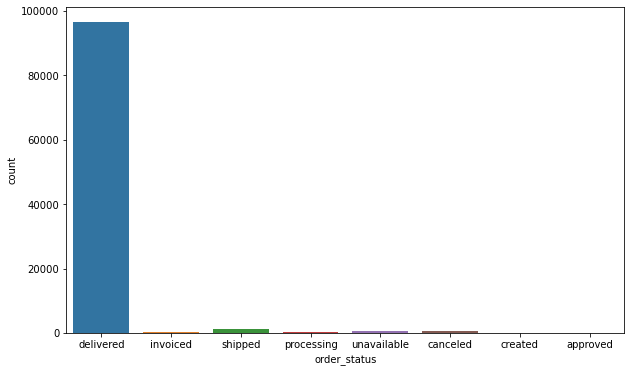

In [12]:
# checking the delivery status
plt.figure(figsize=[10,6])
sns.countplot(orders.order_status)
plt.show()

# status = delivered

In [13]:
# filtering only orders that are delivered
orders = orders[orders.order_status == 'delivered']
orders.shape

(96478, 7)

In [14]:
#checking for null values
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [15]:
#filling null values
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace=True)

In [16]:
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [17]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

We have cleaned the orders dataset and it does not need  any more cleaning after filling the null values  

# order_items

In [18]:
# reading order_items dataset
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name="order_items")
order_items.shape

(112650, 6)

In [19]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


In [20]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


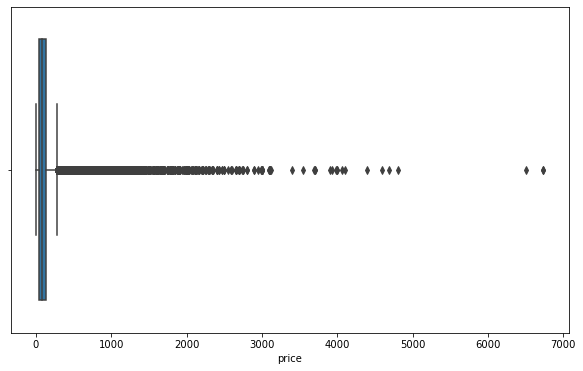

In [21]:
#checking the price column
plt.figure(figsize=[10,6])
sns.boxplot(order_items.price)
plt.show()

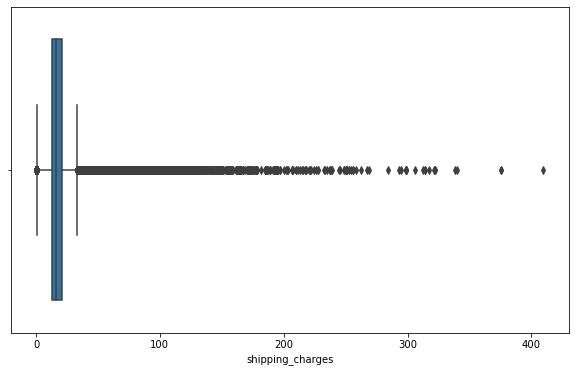

In [22]:
#checking the shipping charges column
plt.figure(figsize=[10,6])
sns.boxplot(order_items.shipping_charges)
plt.show()

In [23]:
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

This does not need any cleaning

# Customers

In [24]:
#reading customers dataset
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name="customers")
customers.shape

(99441, 4)

In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [26]:
#checking for duplicates if any
customers.customer_id.duplicated().sum()

3345

In [27]:
#dropping the duplicate values
customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [28]:
#rechecking for duplicate values in customer id
customers.customer_id.duplicated().sum()

0

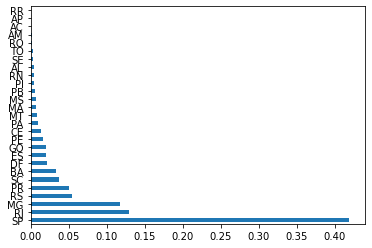

In [32]:
#checking state wise orders
customers.customer_state.value_counts(normalize=True).plot.barh()
plt.show()

In [33]:
#checking if this column has null values
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

The customer dataset is cleaned

# Payments

In [34]:
#reading the payment dataset
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
payments.shape

(103886, 5)

In [35]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [36]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.2+ MB


In [37]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [38]:
#checking for null values
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [39]:
#checking payment type 
payments.payment_type.value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

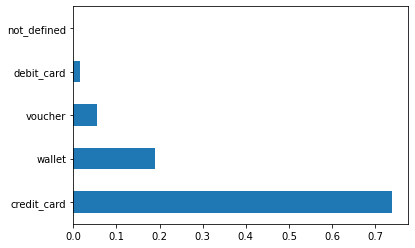

In [40]:
payments.payment_type.value_counts(normalize=True).plot.barh()
plt.show()

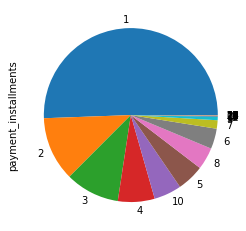

In [41]:
#analysing the number of installments
payments.payment_installments.value_counts(normalize=True).plot.pie()
plt.show()

The payment dataset does not require cleaning

# Products

In [42]:
# reading the products sheet
products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [43]:
# checking if it has null values
products.isna().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [44]:
# checking the product categories
products.product_category_name.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [45]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
diapers_and_hygiene                      1
home_comfort_2                           1
security_and_services                    1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [46]:
products.product_category_name.mode()

0    toys
dtype: object

In [47]:
#Replacing the null values with mode data of the product category column
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)

In [48]:
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [49]:
numeric_cols = list(products.describe().columns)
numeric_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [50]:
#fill the remaining null values using median
for col in numeric_cols:
    products[col].fillna(products[col].median(), inplace=True)

In [51]:
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [52]:
products.product_category_name.value_counts()

toys                                 24895
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
diapers_and_hygiene                      1
home_comfort_2                           1
security_and_services                    1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [53]:
products.product_category_name.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [54]:
#merging only required data for market basket analysis
market_basket = pd.merge(order_items,products,how='inner',on='product_id')

In [55]:
with pd.ExcelWriter(r"C:\Users\USER\Downloads\market_retail_cleaned.xlsx") as excel_sheets:
    #Extracting the clean datasheets
    orders.to_excel(excel_sheets, sheet_name="orders", index=False)
    order_items.to_excel(excel_sheets, sheet_name="order_items", index=False)
    customers.to_excel(excel_sheets, sheet_name="customers", index=False)
    payments.to_excel(excel_sheets, sheet_name="payments", index=False)
    products.to_excel(excel_sheets, sheet_name="products", index=False)
    
    #C:\Users\USER\Downloads\Telegram Desktop\D37 BA Marketing & Retail Capstone

In [56]:
with pd.ExcelWriter(r"C:\Users\USER\Downloads\market_basket_kee.xlsx") as excel_sheets:
    market_basket.to_excel(excel_sheets, sheet_name="market_basket", index=False)

The cleaned dataset is connected to tableau for further analysis.